This block will handle all the necessary imports and load your data, setting a great foundation for our analysis

In [1]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set some display options for pandas to improve readability
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_rows', 100)    # Show more rows

# --- Load the Data ---
# Since our notebook is in the 'notebooks' folder, we need to go up one level ('../') 
# to get to the project root, then into the 'data/raw/' directory.
file_path = '../data/raw/application_train.csv'

# Read the csv file into a pandas DataFrame
try:
    application_train = pd.read_csv(file_path)
    print("Data loaded successfully!")
    print(f"Dataset shape: {application_train.shape}")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please make sure the file path is correct.")

# --- Initial Overview ---
# Display the first 5 rows to get a feel for the data
print("\nFirst 5 rows of the dataset:")
display(application_train.head())

# Display a concise summary of the DataFrame, including data types and non-null values
print("\nDataset information:")
application_train.info()

Data loaded successfully!
Dataset shape: (307511, 122)

First 5 rows of the dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Calculate and Visualize Missing Values
This next step is crucial. We will create a function to calculate the number and percentage of missing values for every single column. This will give us a clear, quantifiable overview of the missing data landscape, which is the first and most important diagnostic.

Here is the code for our next cell.

In [2]:
# --- Calculate and Visualize Missing Values ---

def get_missing_value_summary(data_frame):
    """
    Calculates the number and percentage of missing values for each column.
    
    Args:
        data_frame (pd.DataFrame): The DataFrame to analyze.
        
    Returns:
        pd.DataFrame: A DataFrame summarizing missing values, sorted by percentage.
    """
    # Calculate the number of missing values for each column
    missing_count = data_frame.isnull().sum()
    
    # Calculate the total number of entries
    total_entries = len(data_frame)
    
    # Calculate the percentage of missing values
    missing_percentage = (missing_count / total_entries) * 100
    
    # Create a new DataFrame to hold the results
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage
    })
    
    # Filter out columns with no missing values to focus on the problem areas
    missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
    
    # Sort the DataFrame by the percentage of missing values in descending order
    missing_summary = missing_summary.sort_values(by='Missing Percentage', ascending=False)
    
    return missing_summary

# --- Apply the function and display the results ---
missing_values_summary = get_missing_value_summary(application_train)

print("Summary of columns with missing values:")
display(missing_values_summary)

Summary of columns with missing values:


,Missing Count,Missing Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


/var/folders/hf/d5g_dld107qb4pqtcyhnpb340000gn/T/ipykernel_79412/74687625.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


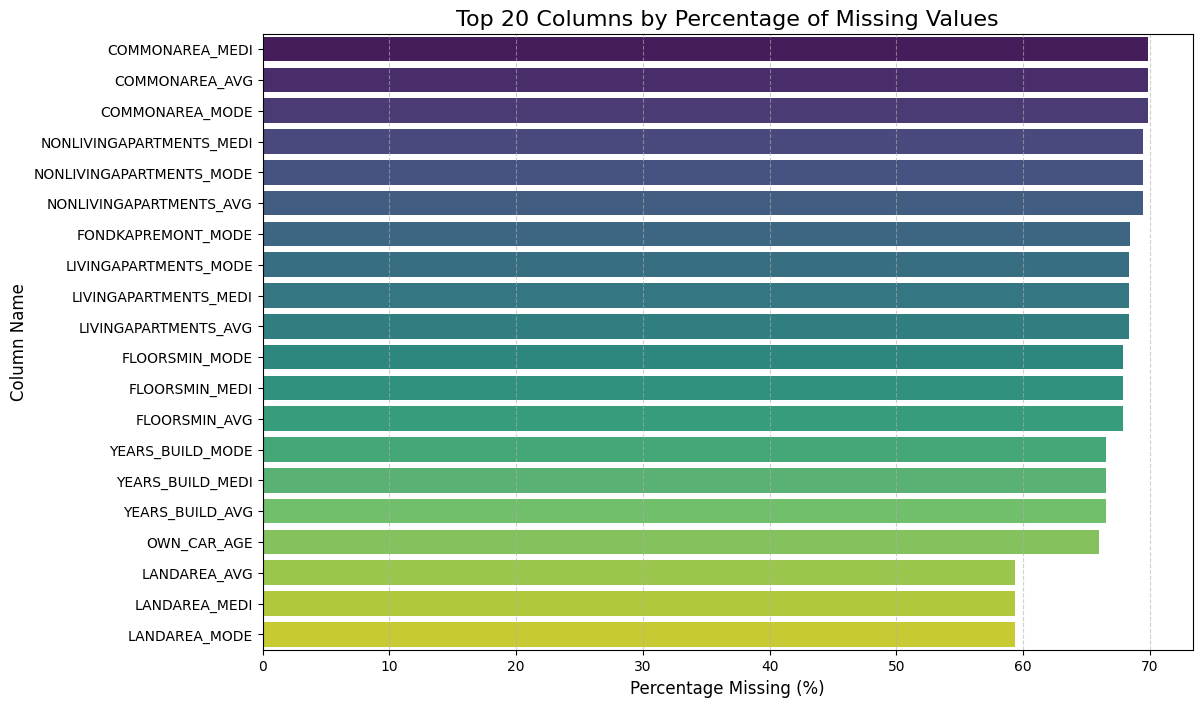

In [3]:
# --- Visualize the Missing Data ---
import matplotlib.pyplot as plt
import seaborn as sns

# We'll visualize the top 20 columns with the most missing data.
top_n = 20
data_to_plot = missing_values_summary.head(top_n)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=data_to_plot['Missing Percentage'], 
    y=data_to_plot.index, 
    palette='viridis'
)

# --- Add plot titles and labels for clarity ---
plt.title(f'Top {top_n} Columns by Percentage of Missing Values', fontsize=16)
plt.xlabel('Percentage Missing (%)', fontsize=12)
plt.ylabel('Column Name', fontsize=12)
plt.xticks(rotation=0) # Keep the x-axis labels horizontal
plt.grid(axis='x', linestyle='--', alpha=0.6) # Add a grid for easier reading

# Display the plot
plt.show()

Formulate a Strategy and Drop Columns
Now we need to make some decisions. Based on our analysis from the table and the chart, we can create a clear strategy:

Drop Columns with High Missing %: For columns missing more than, say, 40% of their data, it's often best to remove them. Imputing this much data would likely introduce more noise than signal.
Impute Columns with Moderate/Low Missing %: For columns with fewer missing values, we can use various techniques to fill them in (impute). We will tackle this in the next step.
Let's start with the first part of our strategy: dropping the columns that are too sparse to be useful. We'll set a threshold of 40% missing data.

In [4]:
# --- Drop Columns with High Percentage of Missing Values ---

# Define the threshold for dropping columns. 
# A common practice is to use a threshold between 40% and 50%. Let's start with 40%.
missing_threshold = 40.0

# Identify the columns to drop based on the summary we already created.
columns_to_drop = missing_values_summary[missing_values_summary['Missing Percentage'] > missing_threshold].index

# --- Create a copy before modifying to avoid SettingWithCopyWarning ---
# This is a best practice to ensure our original dataframe remains unchanged.
application_train_cleaned = application_train.copy()

# Drop the identified columns from the new DataFrame
application_train_cleaned.drop(columns=columns_to_drop, inplace=True)

# --- Report our actions ---
print(f"Number of columns to drop: {len(columns_to_drop)}")
print("Columns dropped:")
for col in columns_to_drop:
    print(f"- {col}")

print(f"\nOriginal number of columns: {application_train.shape[1]}")
print(f"Number of columns after dropping: {application_train_cleaned.shape[1]}")
print(f"Shape of the new cleaned dataset: {application_train_cleaned.shape}")

Number of columns to drop: 49
Columns dropped:
- COMMONAREA_MEDI
- COMMONAREA_AVG
- COMMONAREA_MODE
- NONLIVINGAPARTMENTS_MEDI
- NONLIVINGAPARTMENTS_MODE
- NONLIVINGAPARTMENTS_AVG
- FONDKAPREMONT_MODE
- LIVINGAPARTMENTS_MODE
- LIVINGAPARTMENTS_MEDI
- LIVINGAPARTMENTS_AVG
- FLOORSMIN_MODE
- FLOORSMIN_MEDI
- FLOORSMIN_AVG
- YEARS_BUILD_MODE
- YEARS_BUILD_MEDI
- YEARS_BUILD_AVG
- OWN_CAR_AGE
- LANDAREA_AVG
- LANDAREA_MEDI
- LANDAREA_MODE
- BASEMENTAREA_MEDI
- BASEMENTAREA_AVG
- BASEMENTAREA_MODE
- EXT_SOURCE_1
- NONLIVINGAREA_MEDI
- NONLIVINGAREA_MODE
- NONLIVINGAREA_AVG
- ELEVATORS_MEDI
- ELEVATORS_MODE
- ELEVATORS_AVG
- WALLSMATERIAL_MODE
- APARTMENTS_MODE
- APARTMENTS_MEDI
- APARTMENTS_AVG
- ENTRANCES_MODE
- ENTRANCES_AVG
- ENTRANCES_MEDI
- LIVINGAREA_MEDI
- LIVINGAREA_MODE
- LIVINGAREA_AVG
- HOUSETYPE_MODE
- FLOORSMAX_MEDI
- FLOORSMAX_AVG
- FLOORSMAX_MODE
- YEARS_BEGINEXPLUATATION_AVG
- YEARS_BEGINEXPLUATATION_MEDI
- YEARS_BEGINEXPLUATATION_MODE
- TOTALAREA_MODE
- EMERGENCYSTATE_MODE


Our strategy will be to fill the missing values based on the type of data in each column:

*   **For Numerical Columns:** We will fill the gaps with the **median** value of each column. The median is a great choice because it's not skewed by unusually high or low values (outliers).
*   **For Categorical Columns:** We will fill the gaps with the **mode**, which is simply the most frequently occurring value in the column.

Here is the code to perform this imputation on our `application_train_cleaned` DataFrame.


In [6]:
# --- Step 5: Impute Remaining Missing Values ---

# First, let's see which columns still have missing values in our cleaned dataset
print("--- Missing Values Before Imputation ---")
missing_still = application_train_cleaned.isnull().sum()
print(missing_still[missing_still > 0].sort_values(ascending=False))


# --- Impute Numerical Columns with the Median ---
# We select all columns with a numeric data type
numerical_cols = application_train_cleaned.select_dtypes(include=['number']).columns

# We use a loop to fill each one with its own median
for col in numerical_cols:
    if application_train_cleaned[col].isnull().any():
        median_val = application_train_cleaned[col].median()
        application_train_cleaned[col].fillna(median_val, inplace=True)
        print(f"Imputed numerical column '{col}' with median: {median_val:.2f}")


# --- Impute Categorical Columns with the Mode ---
# We select all columns with an 'object' data type (which are our categorical features)
categorical_cols = application_train_cleaned.select_dtypes(include=['object']).columns

# We use a loop to fill each one with its own mode
for col in categorical_cols:
    if application_train_cleaned[col].isnull().any():
        # The mode() method returns a Series, so we take the first element [0]
        mode_val = application_train_cleaned[col].mode()[0]
        application_train_cleaned[col].fillna(mode_val, inplace=True)
        print(f"Imputed categorical column '{col}' with mode: {mode_val}")


# --- Final Verification ---
# Let's confirm that there are no more missing values
print("\n--- Missing Values After Imputation ---")
print(f"Total missing values remaining: {application_train_cleaned.isnull().sum().sum()}")

--- Missing Values Before Imputation ---
OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
dtype: int64
Imputed numerical column 'AMT_ANNUITY' with median: 24903.00


/var/folders/hf/d5g_dld107qb4pqtcyhnpb340000gn/T/ipykernel_79412/1853838321.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application_train_cleaned[col].fillna(median_val, inplace=True)
/var/folders/hf/d5g_dld107qb4pqtcyhnpb340000gn/T/ipykernel_79412/1853838321.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Imputed numerical column 'AMT_GOODS_PRICE' with median: 450000.00
Imputed numerical column 'CNT_FAM_MEMBERS' with median: 2.00
Imputed numerical column 'EXT_SOURCE_2' with median: 0.57
Imputed numerical column 'EXT_SOURCE_3' with median: 0.54
Imputed numerical column 'OBS_30_CNT_SOCIAL_CIRCLE' with median: 0.00
Imputed numerical column 'DEF_30_CNT_SOCIAL_CIRCLE' with median: 0.00
Imputed numerical column 'OBS_60_CNT_SOCIAL_CIRCLE' with median: 0.00
Imputed numerical column 'DEF_60_CNT_SOCIAL_CIRCLE' with median: 0.00
Imputed numerical column 'DAYS_LAST_PHONE_CHANGE' with median: -757.00
Imputed numerical column 'AMT_REQ_CREDIT_BUREAU_HOUR' with median: 0.00
Imputed numerical column 'AMT_REQ_CREDIT_BUREAU_DAY' with median: 0.00
Imputed numerical column 'AMT_REQ_CREDIT_BUREAU_WEEK' with median: 0.00
Imputed numerical column 'AMT_REQ_CREDIT_BUREAU_MON' with median: 0.00
Imputed numerical column 'AMT_REQ_CREDIT_BUREAU_QRT' with median: 0.00
Imputed numerical column 'AMT_REQ_CREDIT_BUREAU_Y

**What this code does:**

1.  **Identifies Remaining Gaps:** It first prints a list of the columns that still have missing data so we know exactly what we're fixing.
2.  **Imputes Numerical Data:** It loops through all the number-based columns and fills any `NaN` values with the calculated median for that specific column.
3.  **Imputes Categorical Data:** It does the same for all text-based (object) columns, but uses the most frequent value (the mode) instead.
4.  **Verifies the Fix:** Finally, it runs a check to confirm that the total number of missing values in the entire dataset is now zero.

This is a critical data cleaning step. Once you run this, your training dataset will be clean, complete, and ready for the next stage of analysis